In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
from qiskit.quantum_info import SparsePauliOp

# ===============================
# LOAD THE DATA
# ===============================

data = np.load("C2H4_100runs_full_Cobyla.npz", allow_pickle=True)

# --- VQE data ---
energy_histories = list(data["Energy_History"])
final_energies = np.array(data["Final_Energies"], dtype=float)

optimizer = str(data["Optimizer"])
n_runs = int(data["n_runs"])
iters = int(data["iters"])

# --- Energies ---
RHF_Gs = float(data["RHF_Gs"])
CASCI_E1 = float(data["CASCI_E1"])
CASCI_E2 = float(data["CASCI_E2"])

# --- Active space info ---
ncas = int(data["ncas"])
nelecas = tuple(data["nelecas"])
cas_space_symmetry = json.loads(str(data["cas_space_symmetry"]))

# --- Hamiltonian ---
H_list = list(data["Hamiltonian_Pauli_List"])
H = SparsePauliOp.from_list(H_list)

print("✅ Data loaded successfully")
print("Optimizer:", optimizer)
print("n_runs:", n_runs)
print("ncas:", ncas)
print("nelecas:", nelecas)
print("CASCI active-space energy:", CASCI_E2)


✅ Data loaded successfully
Optimizer: cobyla
n_runs: 100
ncas: 4
nelecas: (np.int64(2), np.int64(2))
CASCI active-space energy: -3.3393068011553595


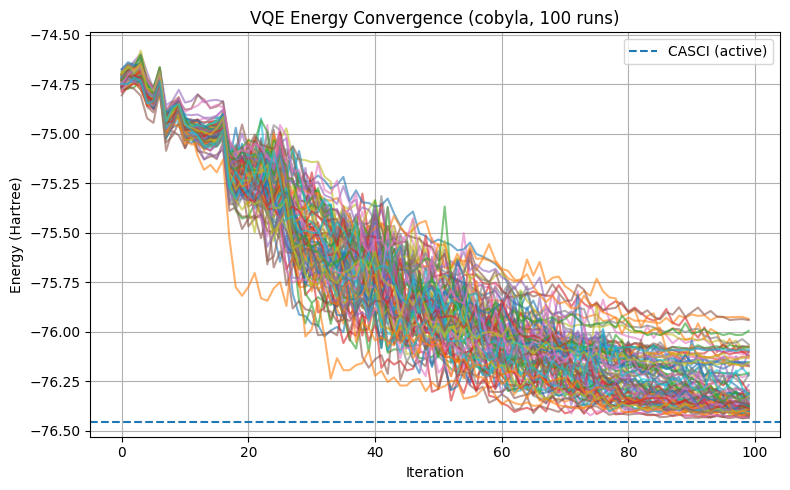

In [3]:
plt.figure(figsize=(8,5))

for i, hist in enumerate(energy_histories):
    iters_i = np.arange(len(hist))
    plt.plot(iters_i, hist, alpha=0.6)

plt.axhline(CASCI_E1, linestyle="--", label="CASCI (active)")
plt.xlabel("Iteration")
plt.ylabel("Energy (Hartree)")
plt.title(f"VQE Energy Convergence ({optimizer}, {n_runs} runs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


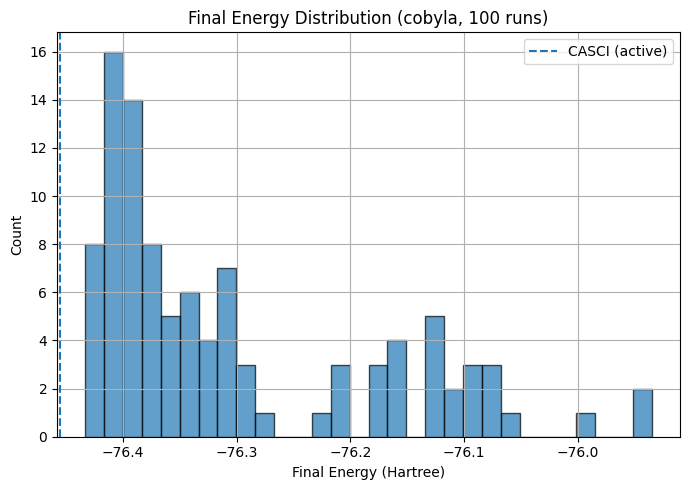

In [4]:
plt.figure(figsize=(7,5))

plt.hist(final_energies, bins=30, edgecolor="black", alpha=0.7)
plt.axvline(CASCI_E1, linestyle="--", label="CASCI (active)")
plt.xlabel("Final Energy (Hartree)")
plt.ylabel("Count")
plt.title(f"Final Energy Distribution ({optimizer}, {n_runs} runs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
